In [ ]:
#Import library yang diperlukan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px

#DATA

In [ ]:
#Import drive untuk mengambil dataset dari GDrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Mengambil dataset dari GDrive

df = pd.read_csv('/content/drive/MyDrive/ML/data_covid.csv')

In [ ]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [ ]:
df.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
31821,9/16/2022,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


In [ ]:
#Remove extra spaces and change the column name into lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths',
       'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths',
       'total_recovered', 'total_active_cases', 'location_level',
       'city_or_regency', 'province', 'country', 'continent', 'island',
       'time_zone', 'special_status', 'total_regencies', 'total_cities',
       'total_districts', 'total_urban_villages', 'total_rural_villages',
       'area_(km2)', 'population', 'population_density', 'longitude',
       'latitude', 'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'total_deaths_per_million',
       'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate',
       'growth_factor_of_new_cases', 'growth_factor_of_new_deaths'],
      dtype='object')

In [ ]:
#Get info from the dataframe
variables = []
dtypes = []
count = []
unique = []
missing = []

for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing,

})

output

,variable,dtype,count,unique,missing
0,date,object,31822,930,0
1,location_iso_code,object,31822,35,0
2,location,object,31822,35,0
3,new_cases,int64,31822,2591,0
4,new_deaths,int64,31822,405,0
5,new_recovered,int64,31822,2541,0
6,new_active_cases,int64,31822,2562,0
7,total_cases,int64,31822,22951,0
8,total_deaths,int64,31822,6419,0
9,total_recovered,int64,31822,21124,0


In [ ]:
print(df['location'].unique(), "\ntotal unique values:", len(df['location_iso_code'].unique()))

['DKI Jakarta' 'Indonesia' 'Riau' 'Jawa Barat' 'Banten' 'Jawa Tengah'
 'Sulawesi Tenggara' 'Bali' 'Kalimantan Timur'
 'Daerah Istimewa Yogyakarta' 'Sumatera Utara' 'Jawa Timur'
 'Kepulauan Riau' 'Sulawesi Selatan' 'Jambi' 'Maluku' 'Papua'
 'Maluku Utara' 'Sumatera Selatan' 'Aceh' 'Kalimantan Tengah' 'Lampung'
 'Sulawesi Tengah' 'Sulawesi Utara' 'Sumatera Barat' 'Papua Barat'
 'Kalimantan Utara' 'Sulawesi Barat' 'Kalimantan Barat'
 'Kalimantan Selatan' 'Kepulauan Bangka Belitung' 'Bengkulu'
 'Nusa Tenggara Barat' 'Nusa Tenggara Timur' 'Gorontalo'] 
total unique values: 35


In [ ]:
df.isna().sum()

date                               0
location_iso_code                  0
location                           0
new_cases                          0
new_deaths                         0
new_recovered                      0
new_active_cases                   0
total_cases                        0
total_deaths                       0
total_recovered                    0
total_active_cases                 0
location_level                     0
city_or_regency                31822
province                         929
country                            0
continent                          0
island                           929
time_zone                        929
special_status                 27264
total_regencies                    0
total_cities                     901
total_districts                    0
total_urban_villages             904
total_rural_villages             929
area_(km2)                         0
population                         0
population_density                 0
l

In [ ]:
#Menghapus kolom yang memiliki data missing
df_1 = df.dropna(axis=1)

In [ ]:
#Get info from the dataframe
variables = []
dtypes = []
count = []
unique = []
missing = []

for item in df_1.columns:
    variables.append(item)
    dtypes.append(df_1[item].dtype)
    count.append(len(df_1[item]))
    unique.append(len(df_1[item].unique()))
    missing.append(df_1[item].isna().sum())

output = pd.DataFrame({
    'variable': variables,
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing,

})

output

,variable,dtype,count,unique,missing
0,date,object,31822,930,0
1,location_iso_code,object,31822,35,0
2,location,object,31822,35,0
3,new_cases,int64,31822,2591,0
4,new_deaths,int64,31822,405,0
5,new_recovered,int64,31822,2541,0
6,new_active_cases,int64,31822,2562,0
7,total_cases,int64,31822,22951,0
8,total_deaths,int64,31822,6419,0
9,total_recovered,int64,31822,21124,0


In [ ]:
#Change datatype from column "date" to datetime64
df['date'] = pd.to_datetime(df['date'])

#examine the dataframe again
df.head()

,date,location_iso_code,location,new_cases,new_deaths,new_recovered,new_active_cases,total_cases,total_deaths,total_recovered,...,latitude,new_cases_per_million,total_cases_per_million,new_deaths_per_million,total_deaths_per_million,total_deaths_per_100rb,case_fatality_rate,case_recovered_rate,growth_factor_of_new_cases,growth_factor_of_new_deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


#DATA PREPARATION

In [ ]:
#Let's analyze how many total cases, deaths, and recovered in each province
prov = df.groupby(['province'])[['total_cases', 'total_recovered', 'total_deaths']].max().reset_index(). sort_values(['total_cases'], ascending=False)
prov['total_active'] = prov['total_cases']-prov['total_recovered']-prov['total_deaths']
prov['death_percentage'] = (prov['total_deaths']/prov['total_cases'])*100
prov['recovered_percentage'] = (prov['total_recovered']/prov['total_cases'])*100
print(prov.shape)
prov

(34, 7)


,province,total_cases,total_recovered,total_deaths,total_active,death_percentage,recovered_percentage
4,DKI Jakarta,1412511,1386134,15513,10864,1.098257,98.132616
8,Jawa Barat,1173731,1144358,15937,13436,1.357807,97.497467
9,Jawa Tengah,636409,601517,33489,1403,5.262182,94.517362
10,Jawa Timur,601545,569003,31764,778,5.280403,94.590263
2,Banten,333875,328482,2950,2443,0.883564,98.384725
5,Daerah Istimewa Yogyakarta,224307,217712,5928,667,2.642807,97.059833
14,Kalimantan Timur,209017,203022,5726,269,2.739490,97.131812
1,Bali,166831,161629,4731,471,2.835804,96.881874
33,Sumatera Utara,158866,154924,3288,654,2.069669,97.518664
25,Riau,152648,147973,4452,223,2.916514,96.937398


In [ ]:
prov.shape

(34, 7)

In [ ]:
#Find correlation between each column
prov.corr()

<ipython-input-15-ca025e219033>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  prov.corr()


,total_cases,total_recovered,total_deaths,total_active,death_percentage,recovered_percentage
total_cases,1.000000,0.999883,0.711362,0.910704,-0.059325,-0.068321
total_recovered,0.999883,1.000000,0.700653,0.914866,-0.070189,-0.057935
total_deaths,0.711362,0.700653,1.000000,0.420673,0.455592,-0.514639
total_active,0.910704,0.914866,0.420673,1.000000,-0.265554,0.114291
death_percentage,-0.059325,-0.070189,0.455592,-0.265554,1.000000,-0.975560
recovered_percentage,-0.068321,-0.057935,-0.514639,0.114291,-0.975560,1.000000


Text(0, 0.5, 'Province')

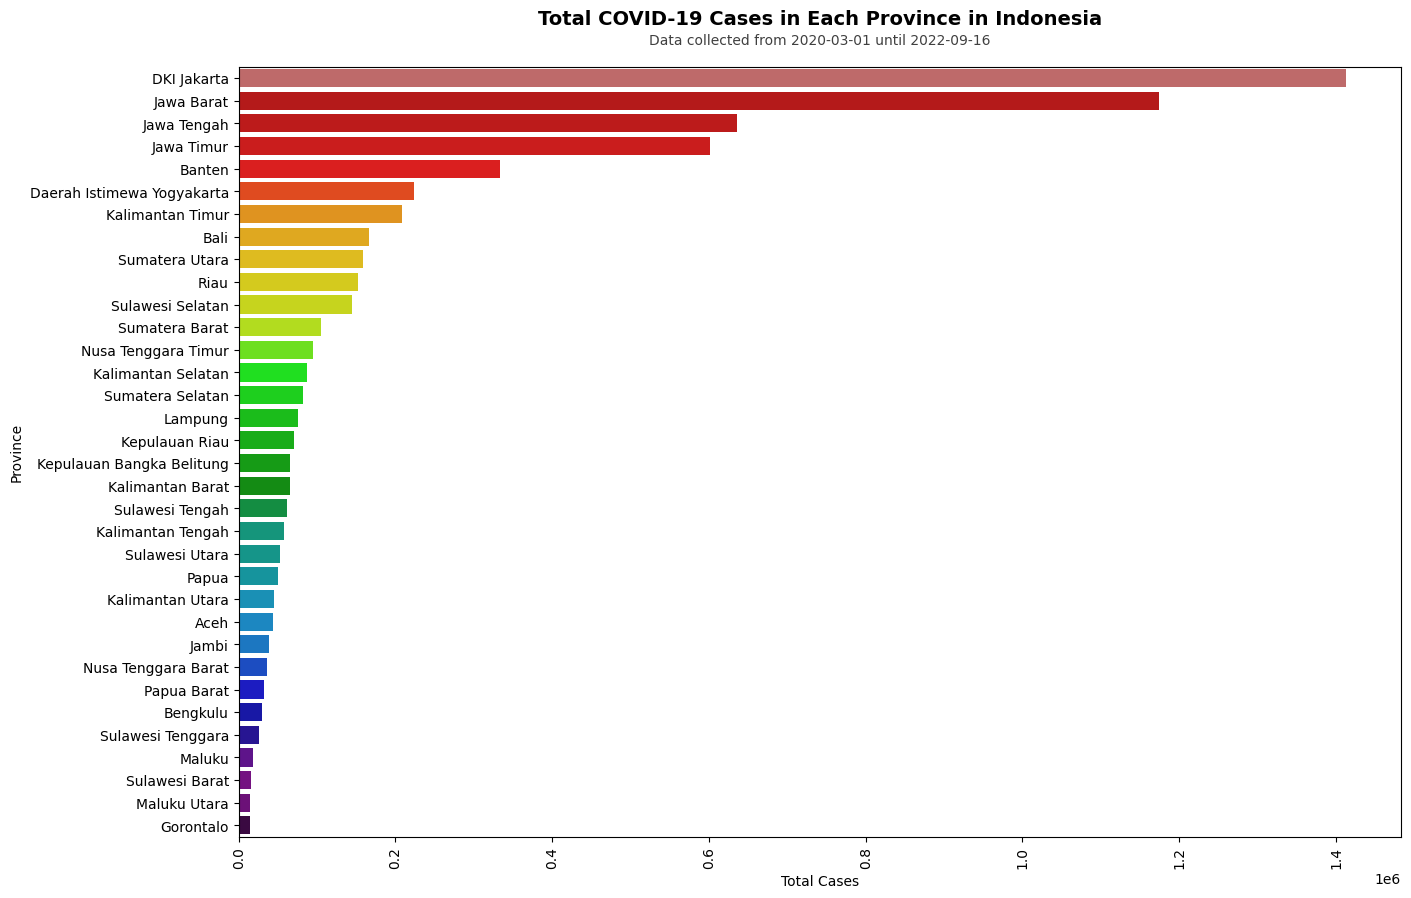

In [ ]:
#Visualize the total case in each province
plt.figure(figsize=(15,10),dpi=100)
plt.xticks(rotation=90)
ax = sns.barplot(x=prov['total_cases'], y=prov['province'], palette="nipy_spectral_r")
ax.text(x=0.5, y=1.05, s='Total COVID-19 Cases in Each Province in Indonesia', fontsize=14, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.025, s='Data collected from 2020-03-01 until 2022-09-16', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.xlabel('Total Cases')
plt.ylabel('Province')

Text(0.5, 0, 'Total Recovered')

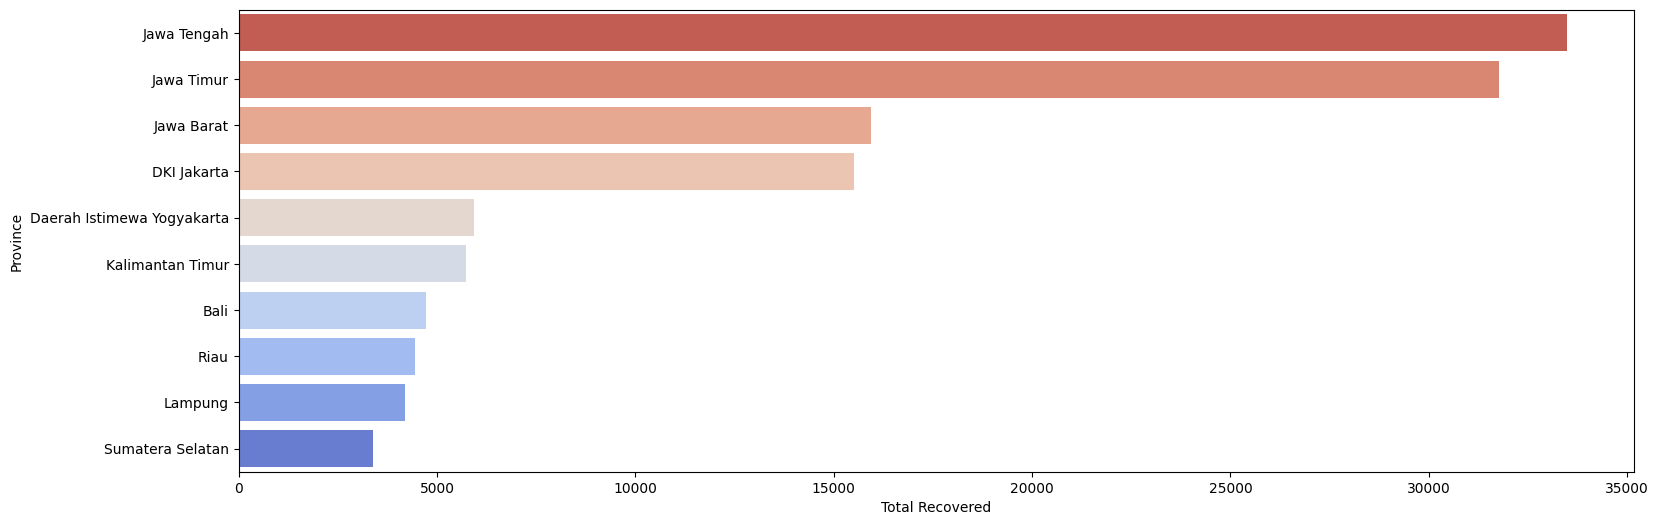

In [ ]:
#Let's see the province with the most total deaths
top_10_deaths = prov.sort_values('total_deaths', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_deaths['total_deaths'],y=top_10_deaths['province'], palette='coolwarm_r')
plt.ylabel('Province')
plt.xlabel('Total Recovered')

Text(0.5, 0, 'Province')

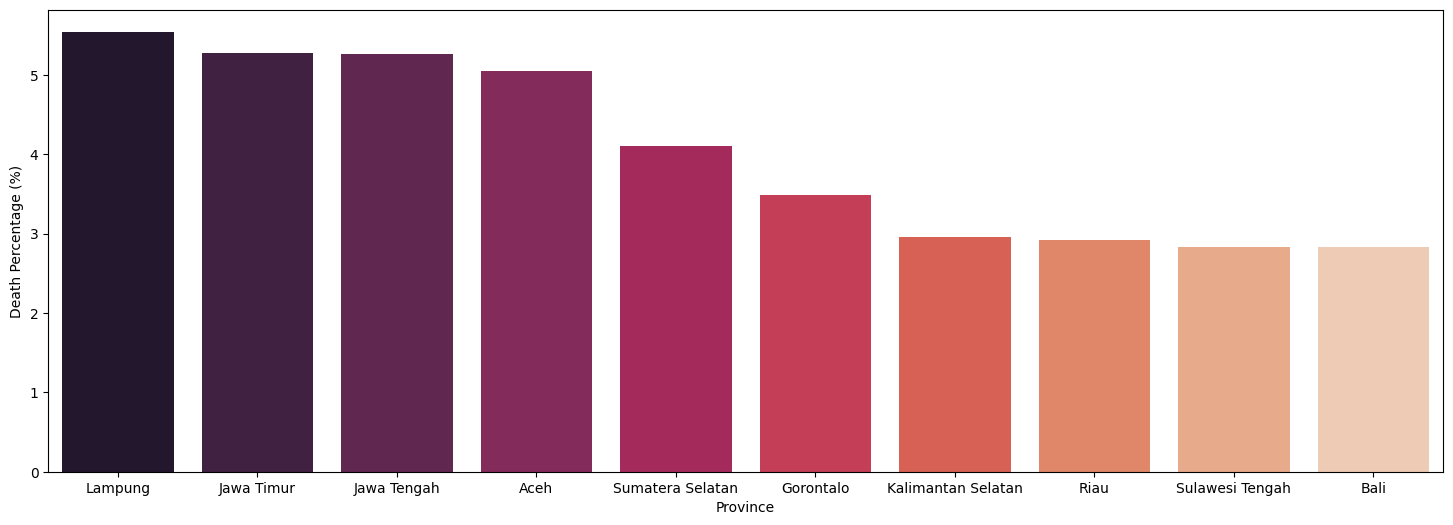

In [ ]:
#Let's see the province with the highest death percentage
top_10_dp= prov.sort_values('death_percentage', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(y=top_10_dp['death_percentage'],x=top_10_dp['province'], palette='rocket')
plt.ylabel('Death Percentage (%)')
plt.xlabel('Province')

Text(0.5, 0, 'Total Recovered')

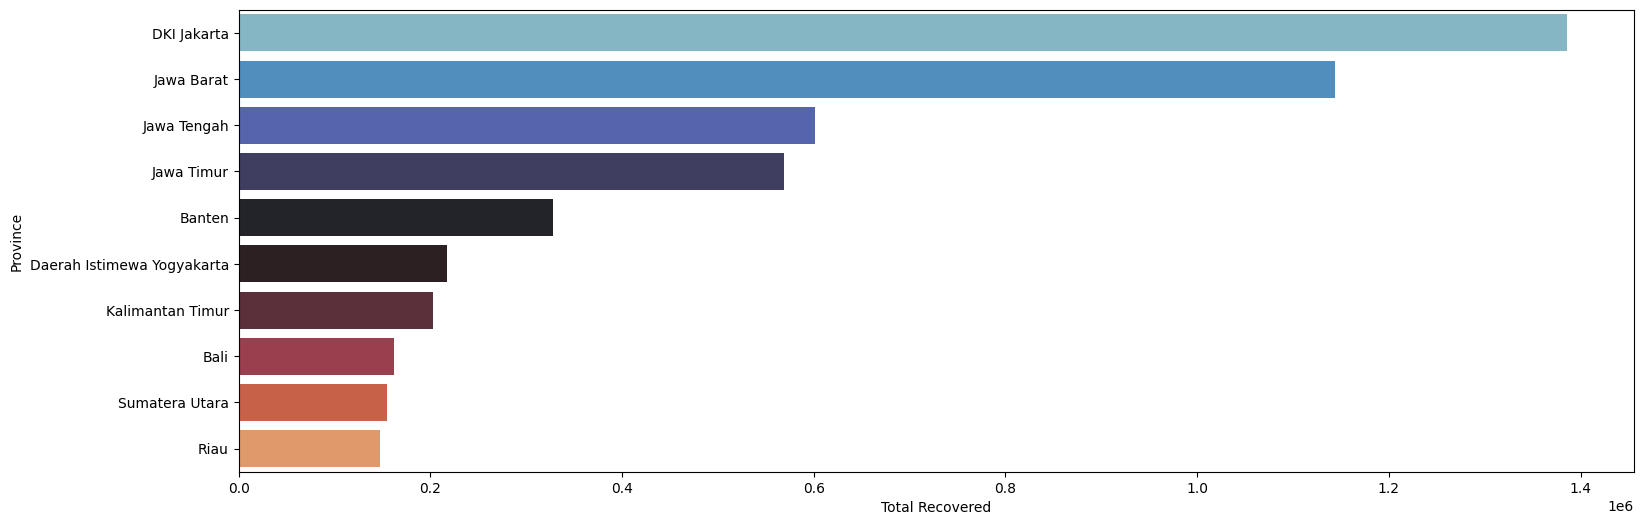

In [ ]:
#Let's see the province with the most total recovered cases
top_10_rec = prov.sort_values('total_recovered', ascending=False).head(10)
plt.figure(figsize=(18,6), dpi=100)
sns.barplot(x=top_10_rec['total_recovered'],y=top_10_rec['province'], palette='icefire')
plt.ylabel('Province')
plt.xlabel('Total Recovered')

In [ ]:
# Menampilkan nilai provinsi beserta atributnya
for i in range(len(prov)):
    province = prov['province'].iloc[i]
    total_cases = prov['total_cases'].iloc[i]
    total_recovered = prov['total_recovered'].iloc[i]
    total_deaths = prov['total_deaths'].iloc[i]
    total_active = prov['total_active'].iloc[i]
    death_percentage = prov['death_percentage'].iloc[i]
    recovered_percentage = prov['recovered_percentage'].iloc[i]

    print(f"Provinsi: {province}")
    print(f"Total Kasus: {total_cases}")
    print(f"Total Sembuh: {total_recovered}")
    print(f"Total Meninggal: {total_deaths}")
    print(f"Total Kasus Aktif: {total_active}")
    print(f"Persentase Kematian: {death_percentage}")
    print(f"Persentase Kesembuhan: {recovered_percentage}")
    print()


Provinsi: DKI Jakarta
Total Kasus: 1412511
Total Sembuh: 1386134
Total Meninggal: 15513
Total Kasus Aktif: 10864
Persentase Kematian: 1.0982569339283021
Persentase Kesembuhan: 98.13261631236854

Provinsi: Jawa Barat
Total Kasus: 1173731
Total Sembuh: 1144358
Total Meninggal: 15937
Total Kasus Aktif: 13436
Persentase Kematian: 1.3578068569374073
Persentase Kesembuhan: 97.4974674776418

Provinsi: Jawa Tengah
Total Kasus: 636409
Total Sembuh: 601517
Total Meninggal: 33489
Total Kasus Aktif: 1403
Persentase Kematian: 5.262182024452828
Persentase Kesembuhan: 94.51736226231873

Provinsi: Jawa Timur
Total Kasus: 601545
Total Sembuh: 569003
Total Meninggal: 31764
Total Kasus Aktif: 778
Persentase Kematian: 5.280402962371893
Persentase Kesembuhan: 94.59026340506529

Provinsi: Banten
Total Kasus: 333875
Total Sembuh: 328482
Total Meninggal: 2950
Total Kasus Aktif: 2443
Persentase Kematian: 0.8835642081617372
Persentase Kesembuhan: 98.38472482216399

Provinsi: Daerah Istimewa Yogyakarta
Total Kas

In [ ]:
df_ =  prov.drop(['province'], axis=1)

In [ ]:
prov_1 = prov[['total_cases', 'total_recovered','total_deaths', 'total_active', 'death_percentage', 'recovered_percentage']]

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#Penerapan Algoritma KMeans

#Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

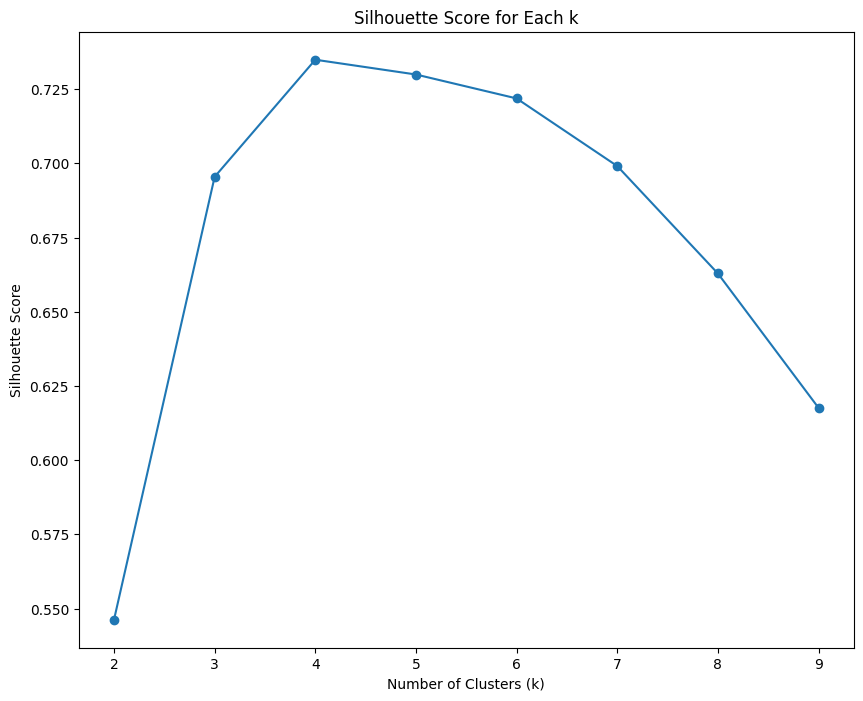

In [ ]:
# Menyimpan nilai Silhouette Score untuk setiap k
silhouette_scores = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 10)

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Menginisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melatih model pada data
    kmeans.fit(prov_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(prov_, labels)

    # Menyimpan nilai Silhouette Score
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each k')
plt.show()


In [ ]:
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(prov_)
    sil_score1= silhouette_score(prov_, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For n_clusters = 2 The average silhouette_score is : 0.5462318879763148
For n_clusters = 3 The average silhouette_score is : 0.6954702743001638
For n_clusters = 4 The average silhouette_score is : 0.7349297044278886
For n_clusters = 5 The average silhouette_score is : 0.7299494390619756
For n_clusters = 6 The average silhouette_score is : 0.7218864533146914
For n_clusters = 7 The average silhouette_score is : 0.6990947169626349
For n_clusters = 8 The average silhouette_score is : 0.6629008883980247
For n_clusters = 9 The average silhouette_score is : 0.6176142413583171


**Dari Silhoutte Score didapat jumlah klaster optimal adalah 4, dengan nilai Silhouette Score nya sebesar 0.734**

#DBI Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=2: 0.6625085888744597


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=3: 0.37916554013853054


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=4: 0.29373170373881874


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=5: 0.3173624165618045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=6: 0.3571490444519158


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=7: 0.32547646735283375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=8: 0.3382296165347412


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBI for k=9: 0.36594586086465747


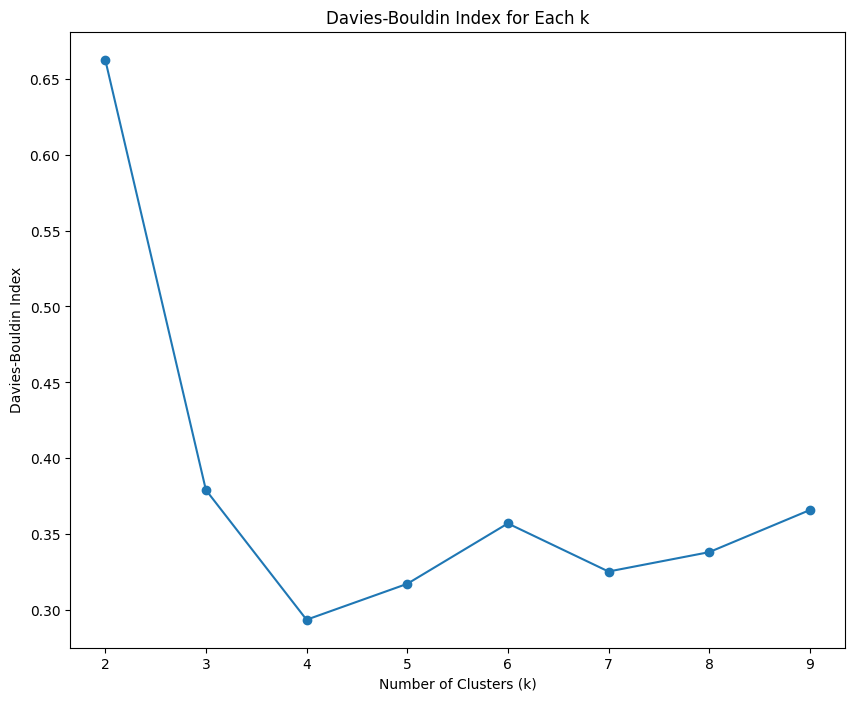

In [ ]:
# Menyimpan nilai DBI untuk setiap k
dbi_scores = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 10)

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Menginisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melatih model pada data
    kmeans.fit(prov_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

    # Memastikan jumlah klaster lebih dari satu
    if len(set(labels)) > 1:
        # Menghitung Davies-Bouldin Index
        dbi = davies_bouldin_score(prov_, labels)

        # Menyimpan nilai DBI
        dbi_scores.append(dbi)

        # Menampilkan nilai DBI
        print(f"DBI for k={k}: {dbi}")
    else:
        print(f"Skipping evaluation for k={k}: Only one cluster is present")

# Plot DBI
plt.plot(k_range, dbi_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Each k')
plt.show()


**Dari DBI Score didapat jumlah klaster optimal adalah 4, dengan nilai DBI Score nya sebesar 0.293**

#Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

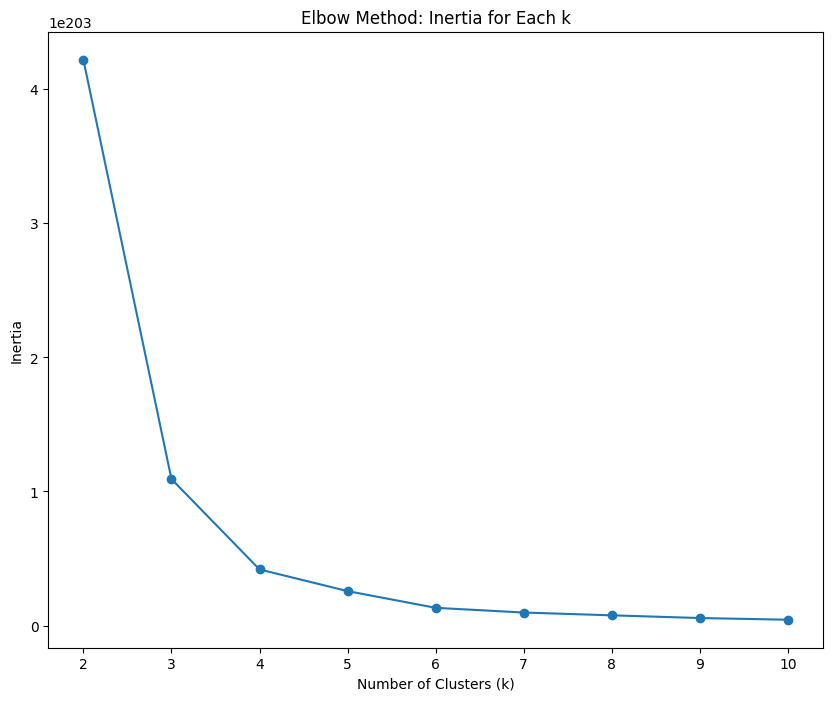

In [ ]:
# Menyimpan inersia untuk setiap nilai k
inertia = []

# Menyimpan skor siluet untuk setiap nilai k
silhouette_scores = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 11)

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Menginisialisasi model K-Means
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Melatih model pada data
    kmeans.fit(prov_)

    # Menyimpan inersia
    inertia.append(kmeans.inertia_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

# Plot Elbow Method (Inertia)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia for Each k')
plt.show()


**Dari Elbow Method didapat jumlah klaster optimal adalah 4, dapat dilihat k=4 sudah mulai terjadi penurunan inersia yg sudah tidak curam lagi**

#Penerapan Algoritma Minibatch KMeans

#Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

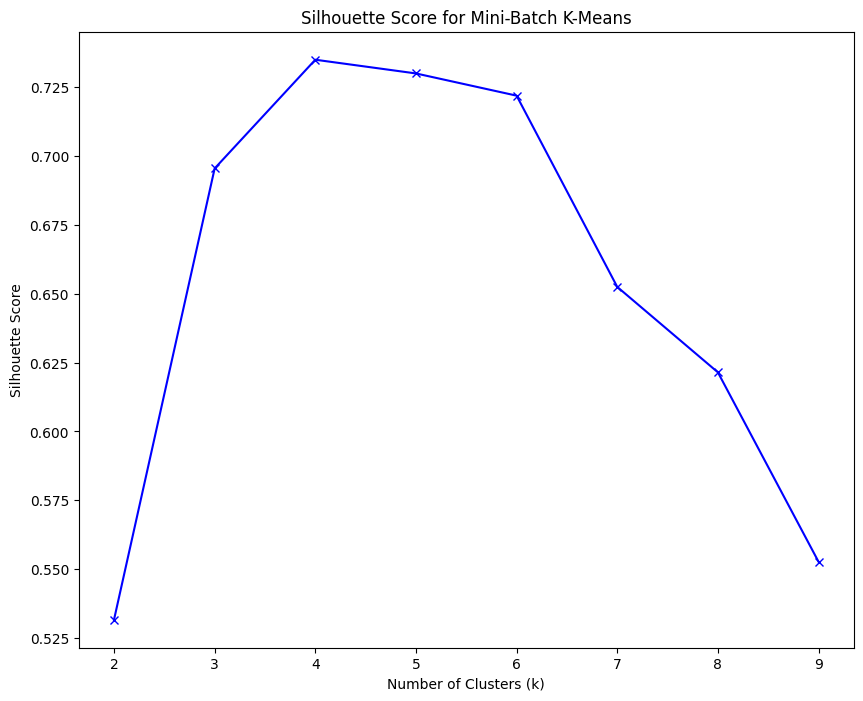

In [ ]:
# Menyimpan nilai Silhouette Score untuk setiap k
silhouette_scores = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 10)

## Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Membuat objek MiniBatchKMeans
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)

    # Melatih model MiniBatchKMeans pada data
    kmeans.fit(prov_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(prov_, labels)

    # Menyimpan nilai Silhouette Score
    silhouette_scores.append(silhouette_avg)

# Menampilkan plot Silhouette Score
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Mini-Batch K-Means')
plt.show()


In [ ]:
list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(prov_)
    sil_score1= silhouette_score(prov_, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5316848549393214
For n_clusters = 3 The average silhouette_score is : 0.6954702743001638


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.7349297044278886


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.7299494390619756
For n_clusters = 6 The average silhouette_score is : 0.7218864533146914


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.652480693557453
For n_clusters = 8 The average silhouette_score is : 0.6214675234733835


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.5527214717535128


**Dari Silhoutte Score didapat jumlah klaster optimal adalah 4, dengan nilai Silhouette Score nya sebesar 0.734**


#DBI Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

DBI for k=2: 0.5273383016392932
DBI for k=3: 0.37916554013853054
DBI for k=4: 0.29373170373881874
DBI for k=5: 0.3173624165618045
DBI for k=6: 0.3571490444519158
DBI for k=7: 0.43858202016040676
DBI for k=8: 0.3702748431341578
DBI for k=9: 0.49480343289835294


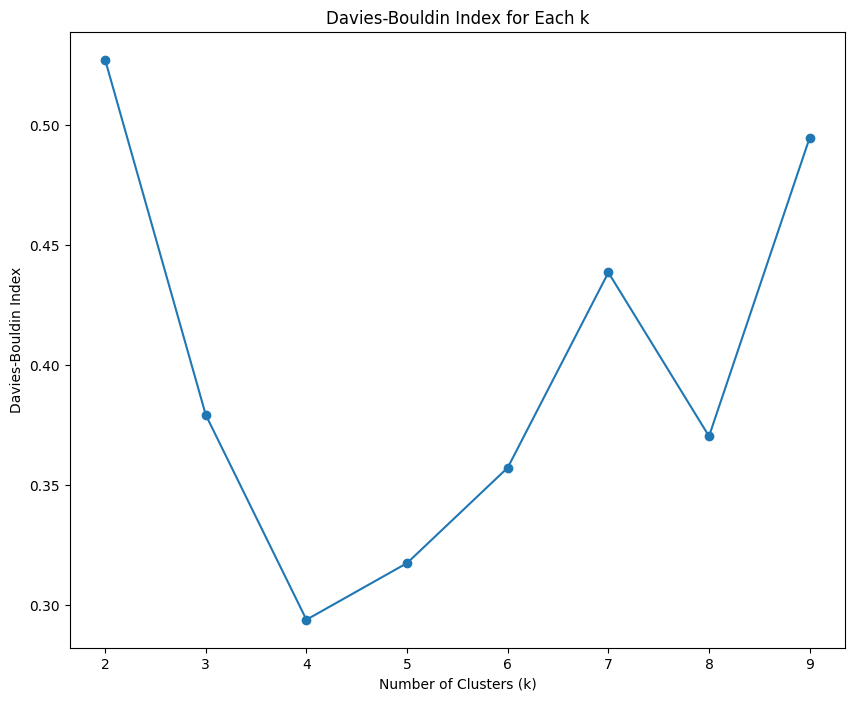

In [ ]:
# Menyimpan nilai DBI untuk setiap k
dbi_scores = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 10)

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Menginisialisasi model K-Means
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)

    # Melatih model pada data
    kmeans.fit(prov_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

    # Memastikan jumlah klaster lebih dari satu
    if len(set(labels)) > 1:
        # Menghitung Davies-Bouldin Index
        dbi = davies_bouldin_score(prov_, labels)

        # Menyimpan nilai DBI
        dbi_scores.append(dbi)

        # Menampilkan nilai DBI
        print(f"DBI for k={k}: {dbi}")
    else:
        print(f"Skipping evaluation for k={k}: Only one cluster is present")

# Plot DBI
plt.plot(k_range, dbi_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Each k')
plt.show()


**Dari DBI Score didapat jumlah klaster optimal adalah 4, dengan nilai DBI Score nya sebesar 0.293**

#Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

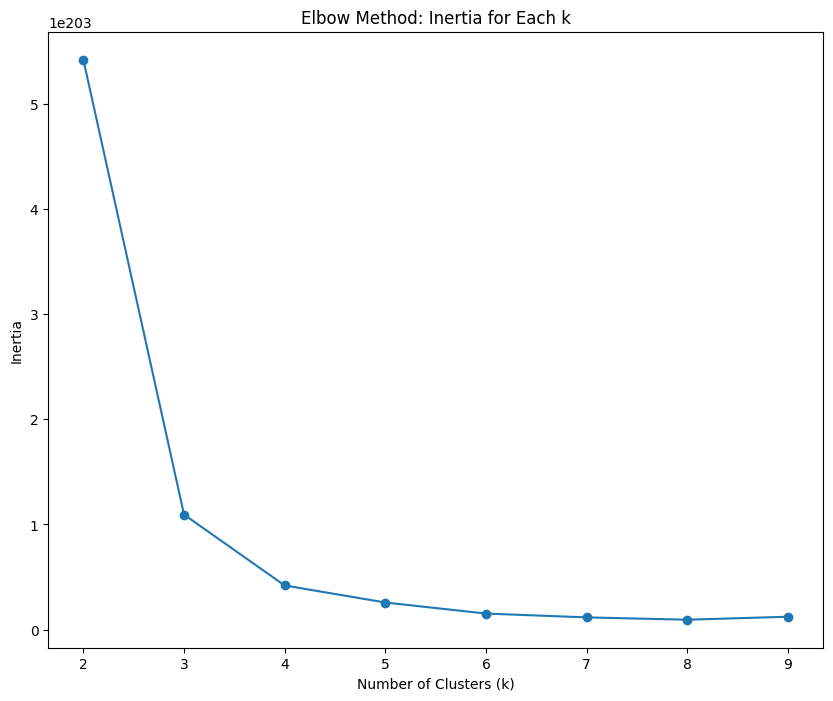

In [ ]:
# Menyimpan inersia untuk setiap nilai k
inertia = []

# Menentukan k range yang akan dievaluasi
k_range = range(2, 10)

# Melakukan iterasi untuk setiap nilai k
for k in k_range:
    # Menginisialisasi model K-Means
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)

    # Melatih model pada data
    kmeans.fit(prov_)

    # Menyimpan inersia
    inertia.append(kmeans.inertia_)

    # Mendapatkan label klaster untuk setiap data
    labels = kmeans.labels_

# Plot Elbow Method (Inertia)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Inertia for Each k')
plt.show()


**Dari Elbow Method didapat jumlah klaster optimal adalah 4, dapat dilihat k=4 sudah mulai terjadi penurunan inersia yg sudah tidak curam lagi**

# Pengklasteran Menggunakan K=4

#KMeans

In [ ]:
#Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(prov_1)

# Assign the labels
prov['Cluster_Id'] = kmeans.predict(prov_1)
prov.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,province,total_cases,total_recovered,total_deaths,total_active,death_percentage,recovered_percentage,Cluster_Id
4,DKI Jakarta,1412511,1386134,15513,10864,1.098257,98.132616,1
8,Jawa Barat,1173731,1144358,15937,13436,1.357807,97.497467,1
9,Jawa Tengah,636409,601517,33489,1403,5.262182,94.517362,2
10,Jawa Timur,601545,569003,31764,778,5.280403,94.590263,2
2,Banten,333875,328482,2950,2443,0.883564,98.384725,3


In [ ]:
# Get the centroid coordinates for each cluster
centroids = kmeans.cluster_centers_

# Create a dataframe to store the centroids
centroids_df = pd.DataFrame(centroids, columns=['total_cases', 'total_recovered', 'total_deaths', 'total_active', 'death_percentage', 'recovered_percentage' ])

# Print the centroid coordinates for each cluster
print(centroids_df)


    total_cases  total_recovered  total_deaths  total_active  \
0  5.144013e+04     4.993957e+04   1375.217391    125.347826   
1  1.293121e+06     1.265246e+06  15725.000000  12150.000000   
2  6.189770e+05     5.852600e+05  32626.500000   1090.500000   
3  1.985769e+05     1.936576e+05   4222.857143    696.428571   

   death_percentage  recovered_percentage  
0          2.570269             97.195441  
1          1.228032             97.815042  
2          5.271292             94.553813  
3          2.258235             97.441727  


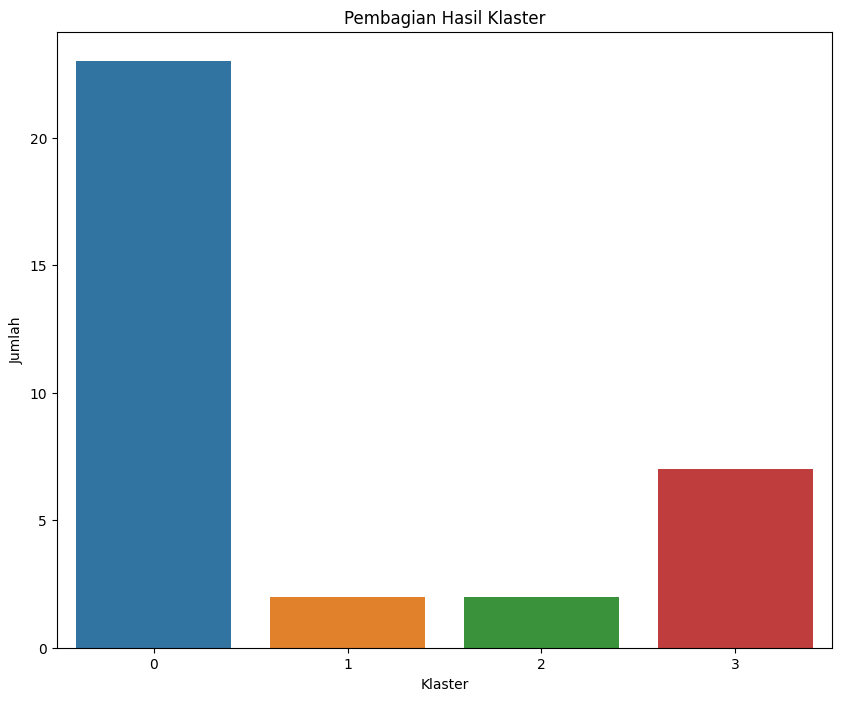

In [ ]:
# Visualisasi Pembagian Hasil Klaster
sns.countplot(x='Cluster_Id', data=prov)
plt.title('Pembagian Hasil Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Pembagian Setiap Provinsi ke Klaster
cluster_assignment = prov.groupby('Cluster_Id')['province'].unique()
for cluster, provinces in cluster_assignment.items():
    provinces = [str(province) for province in provinces]  # Mengonversi nilai menjadi string
    print("Klaster {}: {}".format(cluster, ", ".join(provinces)))


Klaster 0: Sumatera Barat, Nusa Tenggara Timur, Kalimantan Selatan, Sumatera Selatan, Lampung, Kepulauan Riau, Kepulauan Bangka Belitung, Kalimantan Barat, Sulawesi Tengah, Kalimantan Tengah, Sulawesi Utara, Papua, Kalimantan Utara, Aceh, Jambi, Nusa Tenggara Barat, Papua Barat, Bengkulu, Sulawesi Tenggara, Maluku, Sulawesi Barat, Maluku Utara, Gorontalo
Klaster 1: DKI Jakarta, Jawa Barat
Klaster 2: Jawa Tengah, Jawa Timur
Klaster 3: Banten, Daerah Istimewa Yogyakarta, Kalimantan Timur, Bali, Sumatera Utara, Riau, Sulawesi Selatan


In [ ]:
from tabulate import tabulate

cluster_assignment = prov.groupby('Cluster_Id')['province'].unique()
for cluster, provinces in cluster_assignment.items():
    province_names = provinces.astype(str)
    sorted_provinces = sorted(province_names)
    table = [[f"Klaster {cluster}"]] + [[province] for province in sorted_provinces]
    print(tabulate(table, headers=["Provinsi"], tablefmt="grid"))
    print()

+---------------------------+
| Provinsi                  |
+===========================+
| Klaster 0                 |
+---------------------------+
| Aceh                      |
+---------------------------+
| Bengkulu                  |
+---------------------------+
| Gorontalo                 |
+---------------------------+
| Jambi                     |
+---------------------------+
| Kalimantan Barat          |
+---------------------------+
| Kalimantan Selatan        |
+---------------------------+
| Kalimantan Tengah         |
+---------------------------+
| Kalimantan Utara          |
+---------------------------+
| Kepulauan Bangka Belitung |
+---------------------------+
| Kepulauan Riau            |
+---------------------------+
| Lampung                   |
+---------------------------+
| Maluku                    |
+---------------------------+
| Maluku Utara              |
+---------------------------+
| Nusa Tenggara Barat       |
+---------------------------+
| Nusa Ten

#MiniBatch KMeans

In [ ]:
#Final model with k=4
mbkmeans = MiniBatchKMeans(n_clusters=4, max_iter=1000)
mbkmeans.fit(prov_1)

# Assign the labels
prov['Cluster_Id'] = mbkmeans.predict(prov_1)
prov.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,province,total_cases,total_recovered,total_deaths,total_active,death_percentage,recovered_percentage,Cluster_Id
4,DKI Jakarta,1412511,1386134,15513,10864,1.098257,98.132616,1
8,Jawa Barat,1173731,1144358,15937,13436,1.357807,97.497467,1
9,Jawa Tengah,636409,601517,33489,1403,5.262182,94.517362,3
10,Jawa Timur,601545,569003,31764,778,5.280403,94.590263,3
2,Banten,333875,328482,2950,2443,0.883564,98.384725,3


In [ ]:
# Get the centroid coordinates for each cluster
centroids = mbkmeans.cluster_centers_

# Create a dataframe to store the centroids
centroids_df = pd.DataFrame(centroids, columns=['total_cases', 'total_recovered', 'total_deaths', 'total_active', 'death_percentage', 'recovered_percentage' ])

# Print the centroid coordinates for each cluster
print(centroids_df)


    total_cases  total_recovered  total_deaths  total_active  \
0  4.533133e+04     4.400110e+04   1212.801802    117.436293   
1  1.276065e+06     1.247976e+06  15755.285714  12333.714286   
2  1.511884e+05     1.470561e+05   3789.982578    342.310105   
3  4.770757e+05     4.559718e+05  19633.333333   1470.595238   

   death_percentage  recovered_percentage  
0          2.548039             97.211272  
1          1.246571             97.769674  
2          2.482936             97.300242  
3          3.509063             96.122639  


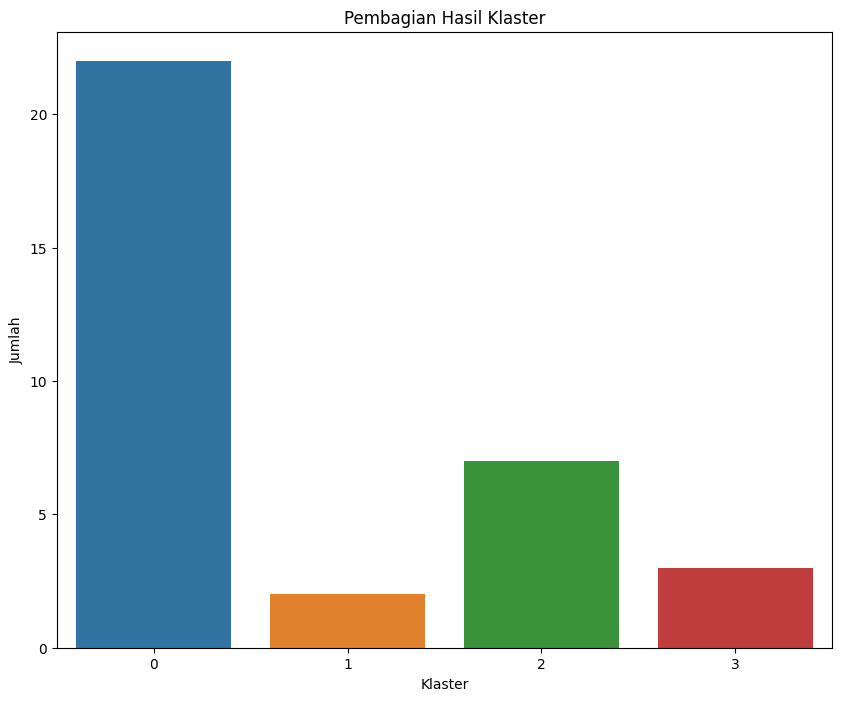

In [ ]:
# Visualisasi Pembagian Hasil Klaster
sns.countplot(x='Cluster_Id', data=prov)
plt.title('Pembagian Hasil Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Pembagian Setiap Provinsi ke Klaster
cluster_assignment = prov.groupby('Cluster_Id')['province'].unique()
for cluster, provinces in cluster_assignment.items():
    provinces = [str(province) for province in provinces]  # Mengonversi nilai menjadi string
    print("Klaster {}: {}".format(cluster, ", ".join(provinces)))


Klaster 0: Nusa Tenggara Timur, Kalimantan Selatan, Sumatera Selatan, Lampung, Kepulauan Riau, Kepulauan Bangka Belitung, Kalimantan Barat, Sulawesi Tengah, Kalimantan Tengah, Sulawesi Utara, Papua, Kalimantan Utara, Aceh, Jambi, Nusa Tenggara Barat, Papua Barat, Bengkulu, Sulawesi Tenggara, Maluku, Sulawesi Barat, Maluku Utara, Gorontalo
Klaster 1: DKI Jakarta, Jawa Barat
Klaster 2: Daerah Istimewa Yogyakarta, Kalimantan Timur, Bali, Sumatera Utara, Riau, Sulawesi Selatan, Sumatera Barat
Klaster 3: Jawa Tengah, Jawa Timur, Banten


In [ ]:
from tabulate import tabulate

cluster_assignment = prov.groupby('Cluster_Id')['province'].unique()
for cluster, provinces in cluster_assignment.items():
    province_names = provinces.astype(str)
    sorted_provinces = sorted(province_names)
    table = [[f"Klaster {cluster}"]] + [[province] for province in sorted_provinces]
    print(tabulate(table, headers=["Provinsi"], tablefmt="grid"))
    print()

+---------------------------+
| Provinsi                  |
+===========================+
| Klaster 0                 |
+---------------------------+
| Aceh                      |
+---------------------------+
| Bengkulu                  |
+---------------------------+
| Gorontalo                 |
+---------------------------+
| Jambi                     |
+---------------------------+
| Kalimantan Barat          |
+---------------------------+
| Kalimantan Selatan        |
+---------------------------+
| Kalimantan Tengah         |
+---------------------------+
| Kalimantan Utara          |
+---------------------------+
| Kepulauan Bangka Belitung |
+---------------------------+
| Kepulauan Riau            |
+---------------------------+
| Lampung                   |
+---------------------------+
| Maluku                    |
+---------------------------+
| Maluku Utara              |
+---------------------------+
| Nusa Tenggara Barat       |
+---------------------------+
| Nusa Ten